In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
def obtain_client_info():
    filename = "creditcardmarketing_2.csv"
    clients = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        headers = next(reader)[0:]
        for row in reader:
            clients.append({key: value for key, value in zip(headers, row[0:])})
    return clients

In [3]:
def separate_yes_no(clients):
    yes_list = []
    no_list = []
    for i in range(1, len(clients)):
        if "Yes" in clients[i]['Offer Accepted']:
            yes_list.append(clients[i])
        else:
            no_list.append(clients[i])
    return yes_list, no_list 

In [4]:
def get_reward_data(clients):
    air_miles = 0
    points = 0
    cash_back = 0
    reward_type = {
        "Air Miles": air_miles,
        "Points": points,
        "Cash Back": cash_back
    }
    for i in range(1, len(clients)):
        if 'Air Miles' in clients[i]['Reward']:            
            reward_type['Air Miles'] += 1
        if 'Points' in clients[i]['Reward']:
            reward_type['Points'] += 1
        else:
            reward_type['Cash Back'] += 1
    return reward_type

In [5]:
def pie_plot(y, labels, title):
    fig = plt.figure()
    plt.title(title)
    plt.pie(y, labels = labels, autopct='%1.1f%%')
    plt.show()

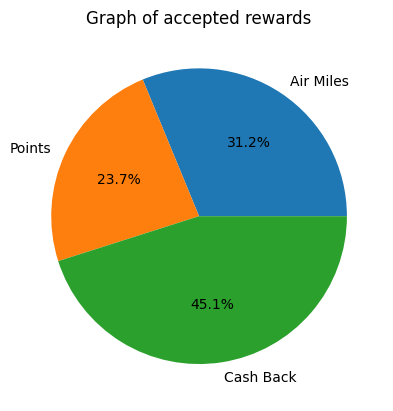

In [6]:
clients = obtain_client_info()
(yes_list,no_list)=separate_yes_no(clients)
#reward = pie_graph(clients)
reward = get_reward_data(yes_list)
pie_plot(list(reward.values()), list(reward.keys()),"Graph of accepted rewards")